# Sample plots in matplotlib

## Simple Line Plot

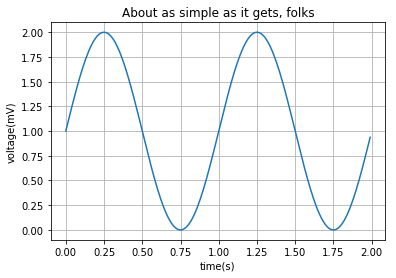

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time(s)', ylabel='voltage(mV)', title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

## Multiple subplots in one figure

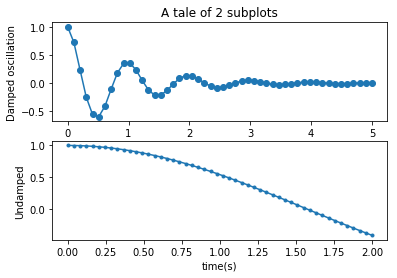

In [3]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi + x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, '-o')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time(s)')
plt.ylabel('Undamped')

plt.show()

## Image Demo

In [4]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

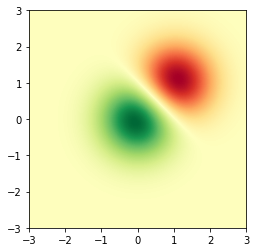

In [7]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn, origin='lower', extent=[-3, 3, -3, 3], vmax=abs(Z).max(), vmin=-abs(Z).max())
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]


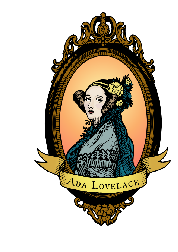

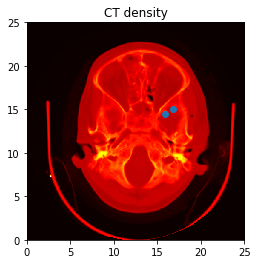

In [15]:
with cbook.get_sample_data('ada.png') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')

w, h = 512, 512

with cbook.get_sample_data('ct.raw.gz', asfileobj=True) as datafile:
    s = datafile.read()

A = np.fromstring(s, np.uint16).astype(float).reshape((w, h))
A /= A.max()

fig, ax = plt.subplots()
extent = (0, 25, 0, 25)
im = ax.imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax.plot(x, y, 'o')

ax.set_title('CT density')

plt.show()

### Interpolating images

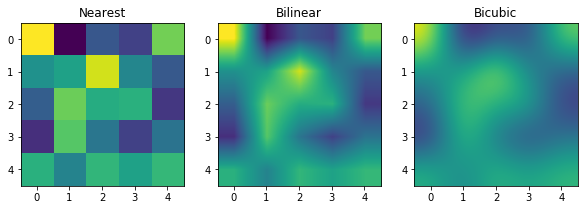

In [18]:
A = np.random.rand(5, 5)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(A, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(False)

plt.show()

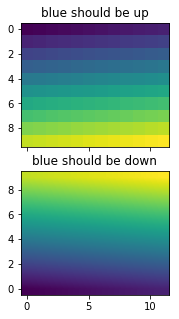

In [24]:
x = np.arange(120).reshape((10, 12))

interp = 'bilinear'
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(3, 5))
axs[0].set_title('blue should be up')
axs[0].imshow(x, origin='upper', interpolation='nearest')

axs[1].set_title('blue should be down')
axs[1].imshow(x, origin='lower', interpolation=interp)
plt.show()

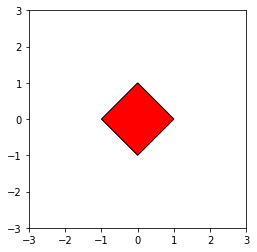

In [26]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X-1)**2 - (Y-1)**2)
Z = (Z1 - Z2) * 2

path = Path([[0, 1], [1, 0], [0, -1], [-1, 0], [0, 1]])
patch = PathPatch(path, facecolor='red')

fig, ax = plt.subplots()
ax.add_patch(patch)

im = ax.imshow(Z, interpolation='bilinear', cmap=cm.gray, origin='lower', extent=[-3, 3, -3, 3], clip_path=patch, clip_on=True)
im.set_clip_path(patch)

plt.show()

## pcolormesh

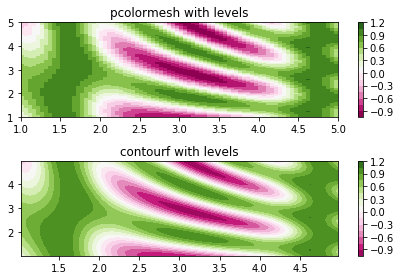

In [28]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

dx, dy = 0.05, 0.05

y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())

cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')

cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels, cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

fig.tight_layout()

plt.show()

## Demo of the histogram function with a few features

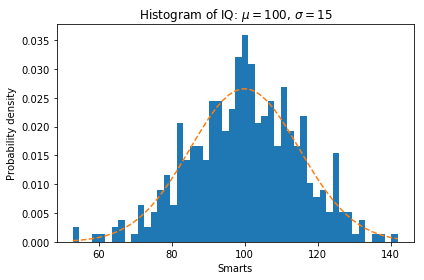

In [31]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

mu = 100
sigma = 15
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density=1)

y = ((1 / (np.sqrt(2 *  np.pi) * sigma)) * 
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

fig.tight_layout()
plt.show()

## PathPatch object

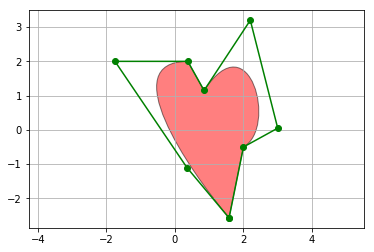

In [34]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

Path = mpath.Path

path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
]

codes, vers = zip(*path_data)
path = mpath.Path(vers, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

## 3D surface (color map)

<IPython.core.display.Javascript object>


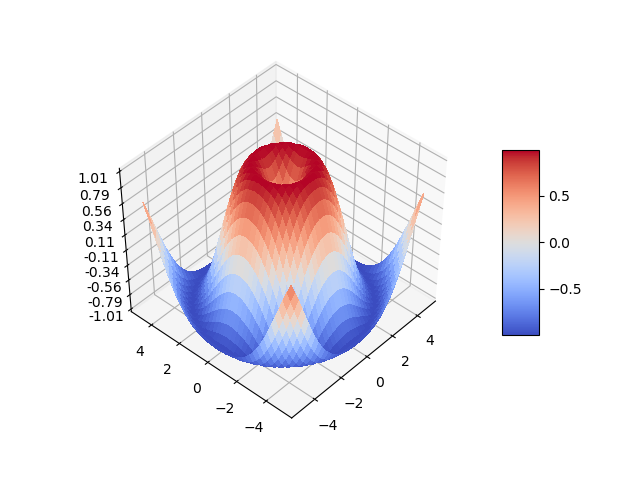

In [38]:
%matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Streamplot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrow=3, ncols=2, height_ratios=[1, 1, 2])

ax0 = fig.add_subplot(gs[0, 0])
